In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Loan_approved.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


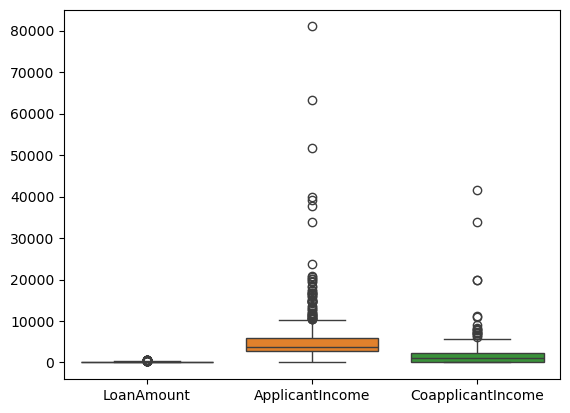

In [8]:
sns.boxplot(data[['LoanAmount','ApplicantIncome','CoapplicantIncome']])
plt.show()

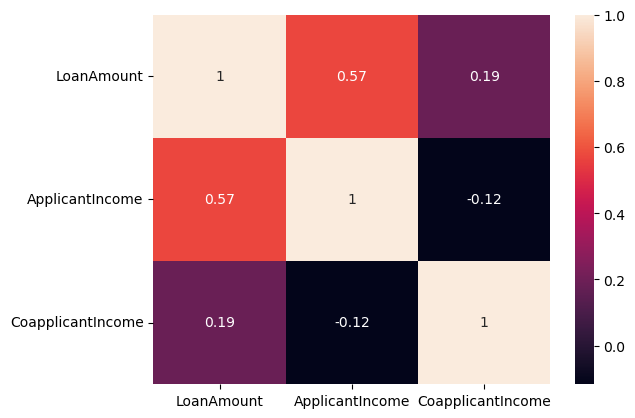

In [9]:
sns.heatmap(data[['LoanAmount','ApplicantIncome','CoapplicantIncome']].corr(),annot=True)
plt.show()

In [10]:
def divide_by_12(x):
    return(x/12)

In [25]:
dis_null_cols=['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term','Credit_History']
cont_null_cols=['LoanAmount']
OHE_columns=["Self_Employed",'Property_Area','Gender']
standard_scaler=["ApplicantIncome","CoapplicantIncome","LoanAmount"]
function_trasformer=["Loan_Amount_Term"]
label_encoder=["Married"]
pass_through=['Credit_History']
dependents_enc=OrdinalEncoder(categories=[['0', '1', '2', '3+']])
education_enc=OrdinalEncoder(categories=[['Not Graduate','Graduate']])

In [26]:
custom=FunctionTransformer(divide_by_12)

In [27]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [28]:
def same(x):
    return x

In [29]:
no_trans=FunctionTransformer(same)

In [30]:
preprocessor=ColumnTransformer([("OHE columns",OneHotEncoder(),OHE_columns),("Label_encoder",ModifiedLabelEncoder(),"Married"),
                                ("standard_scaler",StandardScaler(),standard_scaler),("custom",custom,function_trasformer),("pass through",no_trans,["Credit_History"]),
                                ("ordinal dependents",dependents_enc,['Dependents']),("ordinal education",education_enc,['Education'])])
                           

In [31]:
preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(),
                                 ['Self_Employed', 'Property_Area', 'Gender']),
                                ('Label_encoder', ModifiedLabelEncoder(),
                                 'Married'),
                                ('standard_scaler', StandardScaler(),
                                 ['ApplicantIncome', 'CoapplicantIncome',
                                  'LoanAmount']),
                                ('custom',
                                 FunctionTransformer(func=<function divide_by_12 at 0x000001B074808400>),
                                 ['Loan_Amount_Term']),
                                ('pass through',
                                 FunctionTransformer(func=<function same at 0x000001B07487EFC0>),
                                 ['Credit_History']),
                                ('ordinal dependents',
                                 OrdinalEncoder(categories=[['0', '1', '2',
                                                             '3+']]),
                                 ['Dependents']),
                                ('ordinal education',
                                 OrdinalEncoder(categories=[['Not Graduate',
                                                             'Graduate']]),
                                 ['Education'])])

In [32]:
with open('svm.pkl','wb')as f:
    pickle.dump(preprocessor,f)

In [33]:
f.close()